In [2]:
import math
import time
import matplotlib.pyplot as plt
import torch
import trimesh

from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)

import torch
import torch.nn.functional as F
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj
from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)
from pytorch3d.renderer.blending import BlendParams
from pytorch3d.renderer import TexturesVertex
from src.render.mesh_renderer import MeshPointsRenderer
from src.config import get_parser
from src.blueprint_sampler import BlueprintSampler
from src.util import grid_to_list

In [3]:
# Set the cuda device
device = torch.device("cuda:0")
torch.cuda.set_device(device)

bs = 1
    
config = get_parser().parse_args(args=[])

config.raster_image_size = 512
config.raster_radius = 0.012
config.raster_points_per_pixel = 4
    
d_size = 514
config.data_blueprint = f'blueprint_radial_{d_size}.npz'
config.data_blueprint_size = d_size
config.data_patch_size = d_size
config.raster_max_brightness = 0.9
#parser.add_argument('--raster_blur_radius', type=float, default=0.01)
#parser.add_argument('--raster_faces_per_pixel', type=int, default=4)

blueprintSampler = BlueprintSampler(config)
res = blueprintSampler(bs)
points = res['points']
normals = res['normals']
faces = res['faces']

points = grid_to_list(points).to(device)
normals = grid_to_list(normals).to(device)
#faces = faces.to(device)

points.shape, normals.shape, faces.shape

(torch.Size([1, 264196, 3]),
 torch.Size([1, 264196, 3]),
 torch.Size([1, 526338, 3]))

In [4]:
config.raster_blur_radius = 0.0
config.raster_faces_per_pixel = 4
R = MeshPointsRenderer(config)
R.setup(device)
R = R.to(device)

In [5]:
print(points.shape)

torch.Size([1, 264196, 3])


torch.Size([1, 512, 512, 4])


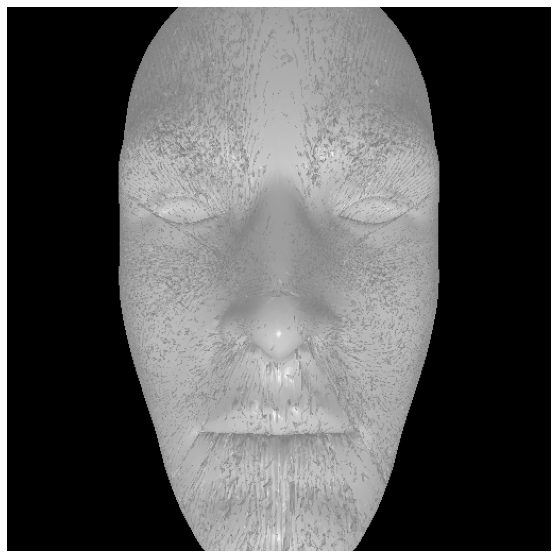

In [8]:
images = R(points)
print(images.shape)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [10]:
images[ ..., :3].shape

torch.Size([1, 512, 512, 3])

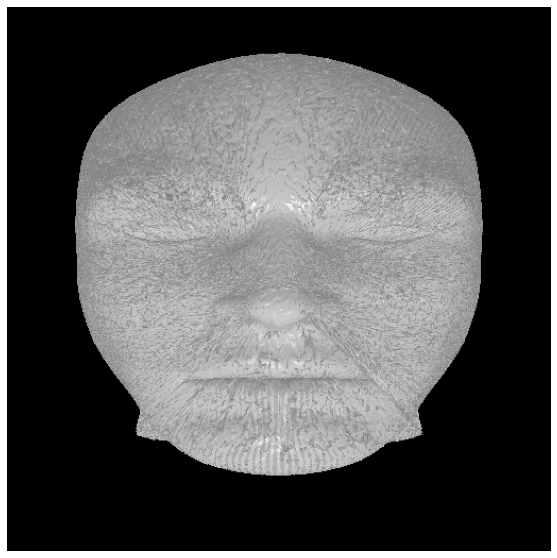

In [37]:
noise_level = 0.003
t_points =  Transform3d().scale(1.25, 0.7, 0.7).to(device).transform_points(points)
images = R(t_points + torch.rand_like(points) * noise_level)


plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [21]:
from pytorch3d.transforms import  Transform3d, Scale

In [26]:
scale = Scale(torch.tensor([1, 0.5])).to(device)
scale.to(device).transform_points(points)

tensor([[[-0.3801, -0.3676,  0.0074],
         [-0.3733, -0.3777,  0.0081],
         [-0.3738, -0.3770,  0.0076],
         ...,
         [ 0.4928,  0.4883,  0.0086],
         [ 0.4934,  0.4774,  0.0077],
         [ 0.4932,  0.4802,  0.0090]],

        [[-0.1901, -0.1838,  0.0037],
         [-0.1867, -0.1888,  0.0040],
         [-0.1869, -0.1885,  0.0038],
         ...,
         [ 0.2464,  0.2441,  0.0043],
         [ 0.2467,  0.2387,  0.0038],
         [ 0.2466,  0.2401,  0.0045]]], device='cuda:0')

In [25]:
Transform3d().scale(2, 1, 3).to(device).transform_points(points)


tensor([[[-0.7602, -0.3676,  0.0222],
         [-0.7467, -0.3777,  0.0242],
         [-0.7477, -0.3770,  0.0228],
         ...,
         [ 0.9855,  0.4883,  0.0257],
         [ 0.9868,  0.4774,  0.0230],
         [ 0.9863,  0.4802,  0.0270]]], device='cuda:0')